<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 160118_c8_D1, &nbsp; animal_5_n18_04102017_cel1 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_5_n18_04102017_cel1.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_546.soma.v': 'expdata/ECall_IV_ch5_546.dat',
    'IV_556.soma.v': 'expdata/ECall_IV_ch5_556.dat',    
    'IDthresh-sub_586.soma.v': 'expdata/ECall_IDthresh_ch5_586.dat',    
    'IDthresh_588.soma.v': 'expdata/ECall_IDthresh_ch5_588.dat',    
    'IDthresh_589.soma.v': 'expdata/ECall_IDthresh_ch5_589.dat',    
    'IDthresh_599.soma.v': 'expdata/ECall_IDthresh_ch5_599.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_5_n18_04102017_cel1.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


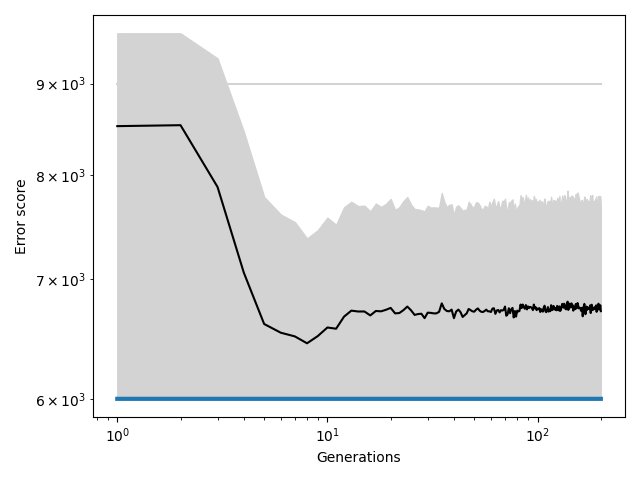

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,4.436e-06,2.341e-06,3.743e-06,3.448e-06,2.451e-06,3.741e-06,3.725e-06,3.615e-06,3.24e-06,3.725e-06
g_pas.somatic,0.00533,0.005992,0.005792,0.005539,0.003533,0.005707,0.005531,0.005792,0.005531,0.005531
g_pas.basal,4.583e-06,3.967e-06,5.752e-06,5.823e-06,3.953e-06,5.862e-06,6.786e-06,5.752e-06,6.88e-06,6.786e-06
gbar_naf.axonal,21.64,22.29,22.4,22.14,22.29,24.46,22.57,22.66,22.86,22.86
gbar_kas.axonal,0.04192,0.04413,0.03705,0.04576,0.04417,0.04943,0.04948,0.03968,0.04963,0.04953
gbar_Im.axonal,0.03678,0.02954,0.02201,0.03547,0.03196,0.02364,0.02554,0.02201,0.02982,0.02554
gbar_naf.somatic,23.36,24.38,23.46,23.81,24.16,23.49,24.34,23.77,24.81,24.34
gbar_kaf.somatic,0.09845,0.002833,0.004607,0.01463,0.005708,0.006405,0.002298,0.004607,0.002298,0.002298
gbar_kas.somatic,0.009529,0.01481,0.003688,0.003034,0.01481,0.01172,0.01194,0.003688,0.01172,0.01172
gbar_kdr.somatic,0.005721,0.005404,0.004282,0.005542,0.005404,0.00805,0.007136,0.00846,0.01206,0.007136


<IPython.core.display.Javascript object>


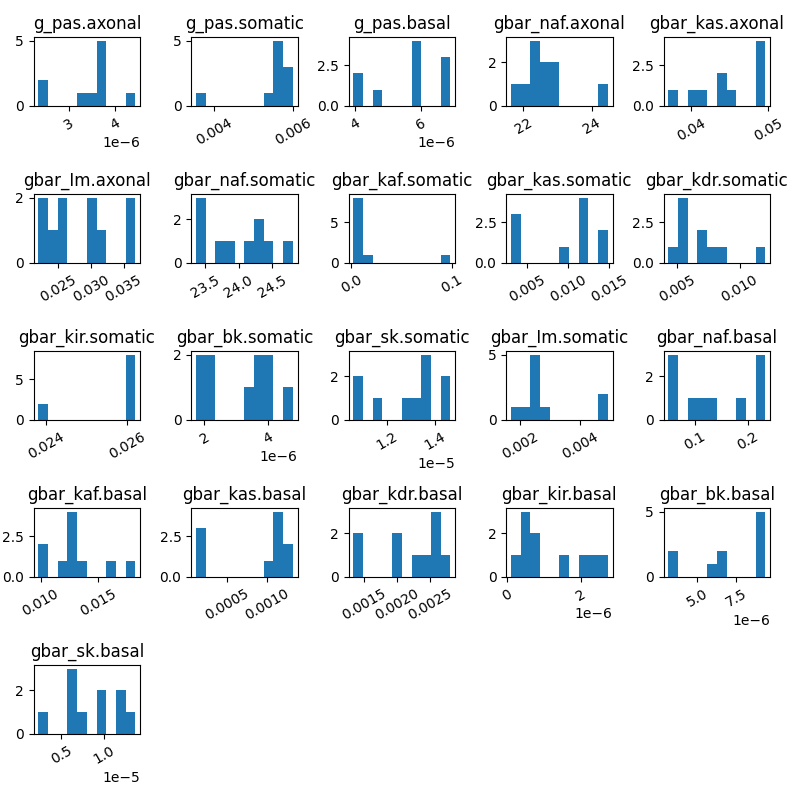

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


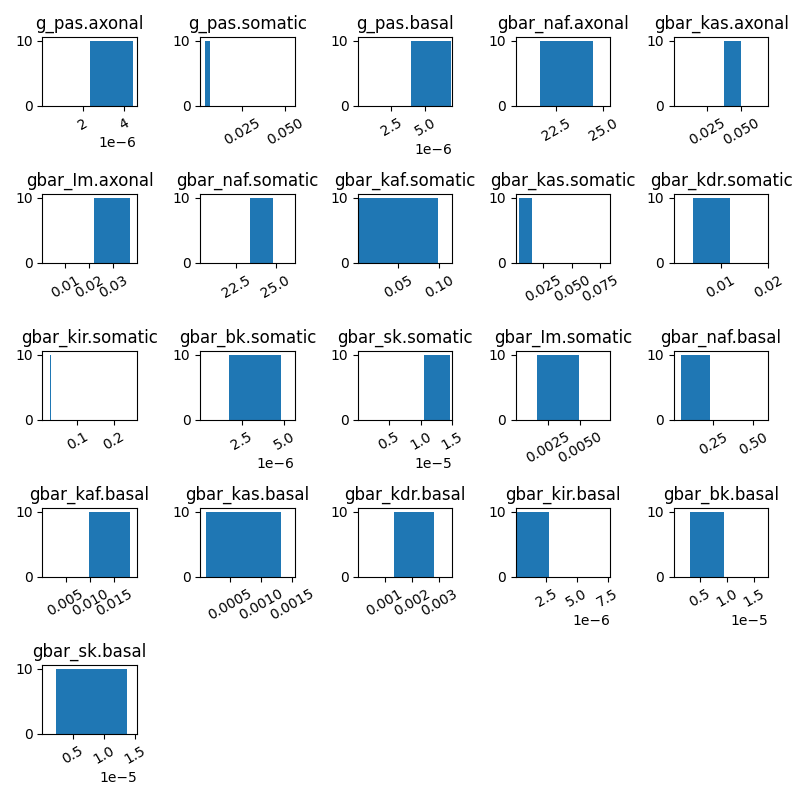

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


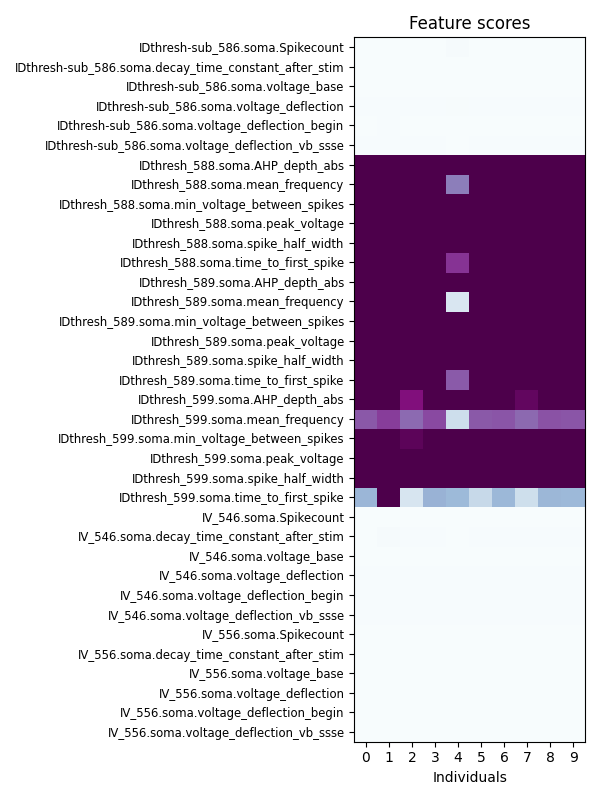

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [30]:
ind = 0
test_parameters = best_models[ind]
test_parameters

{'g_pas.axonal': 4.436094707592465e-06,
 'g_pas.somatic': 0.005329718936497535,
 'g_pas.basal': 4.582840861425147e-06,
 'gbar_naf.axonal': 21.63723759665262,
 'gbar_kas.axonal': 0.04191513117315632,
 'gbar_Im.axonal': 0.036778671600393796,
 'gbar_naf.somatic': 23.35887987335915,
 'gbar_kaf.somatic': 0.09844840369019092,
 'gbar_kas.somatic': 0.009529366070626951,
 'gbar_kdr.somatic': 0.0057209023243373295,
 'gbar_kir.somatic': 0.02620736961392648,
 'gbar_bk.somatic': 4.1044253400995146e-06,
 'gbar_sk.somatic': 1.3794699914662937e-05,
 'gbar_Im.somatic': 0.002468069896771635,
 'gbar_naf.basal': 0.10547059384981664,
 'gbar_kaf.basal': 0.013179360548894185,
 'gbar_kas.basal': 0.001091788576097622,
 'gbar_kdr.basal': 0.002653135742014648,
 'gbar_kir.basal': 2.46602845615377e-06,
 'gbar_bk.basal': 9.351444405767981e-06,
 'gbar_sk.basal': 7.399724276095694e-06}

"""
test_parameters = {
 'g_pas.axonal': 2.0941410051872233e-05,
 'g_pas.somatic': 0.0050197643916807975,
 'g_pas.basal': 5.072566107032641e-07,
 'gbar_naf.axonal': 23.062917540155965,
 'gbar_kas.axonal': 0.09022299938619471*0.1,
 'gbar_Im.axonal': 0.49332059078996815*0.1,
 'gbar_naf.somatic': 20.39060489218216,
 'gbar_kaf.somatic': 0.0005239630477585511,
 'gbar_kas.somatic': 5.3517603834459155e-06,
 'gbar_kdr.somatic': 0.0017888028137215638,
 'gbar_kir.somatic': 0.022841593267528458,
 'gbar_bk.somatic': 1.3118057850038154e-08,
 'gbar_sk.somatic': 5.86905565206195e-07,
 'gbar_Im.somatic': 0.007237557445269308,
 'gbar_naf.basal': 0.042889335369095845,
 'gbar_kaf.basal': 0.00454066021347294,
 'gbar_kas.basal': 0.0004045378932612865,
 'gbar_kdr.basal': 0.0005920898622174892,
 'gbar_kir.basal': 3.988985882119193e-05,
 'gbar_bk.basal': 1.190933438667308e-09,
 'gbar_sk.basal': 1.648260320670791e-06,
}
"""

test_parameters = {
 'g_pas.axonal': 4.636817753212516e-07,
 'g_pas.somatic': 0.0055732622357170065,
 'g_pas.basal': 7.022551719916346e-07,
 'gbar_naf.axonal': 17.978782392761737*1.3,
 'gbar_kas.axonal': 0.00579968068704258*1.2,
 'gbar_Im.axonal': 0.039734102037251716*0.1,
 'gbar_naf.somatic': 18.622019198134126*1.3,
 'gbar_kaf.somatic': 0.023260976866278704*0.5,
 'gbar_kas.somatic': 0.014015993369779567*0.6,
 'gbar_kdr.somatic': 0.004001483018192939*0.5,
 'gbar_kir.somatic': 0.026427178330971718,
 'gbar_bk.somatic': 5.602090339250627e-07,
 'gbar_sk.somatic': 1.504616788547401e-06,
 'gbar_Im.somatic': 0.000734234980675136,
 'gbar_naf.basal': 0.059527508103190546,
 'gbar_kaf.basal': 0.007886813978722916*0.25,
 'gbar_kas.basal': 0.0006197874819662554*0.25,
 'gbar_kdr.basal': 0.0013946517119931133*0.25,
 'gbar_kir.basal': 7.707536085250096e-07,
 'gbar_bk.basal': 1.7616577844575252e-06,
 'gbar_sk.basal': 1.5226507857874983e-06
}
test_parameters

In [35]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

SweepProtocolException: Failed to run Neuron Sweep Protocol

<IPython.core.display.Javascript object>


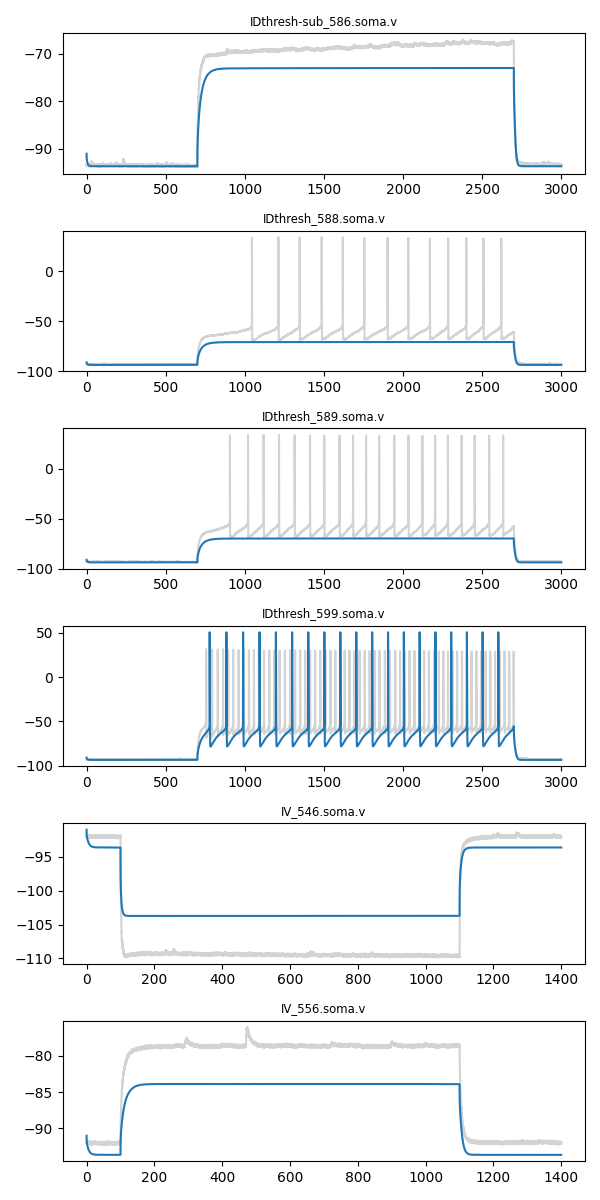

In [36]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


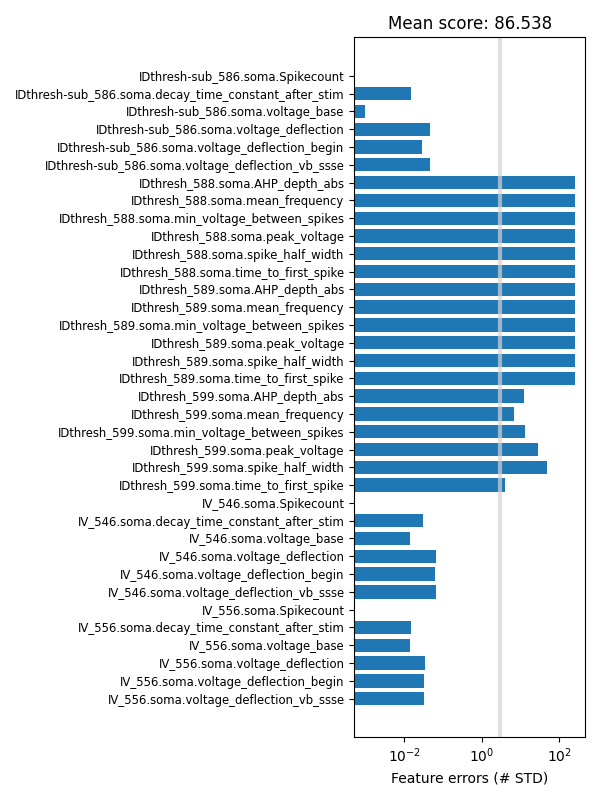

In [33]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.220000,1.750000,0.990000,1.180000,1.390000,1.420000,1.740000,1.330000,1.200000
1,1.220000,0.000000,1.660000,1.260000,1.030000,1.280000,1.140000,1.640000,0.970000,0.800000
2,1.750000,1.660000,0.000000,1.530000,1.470000,1.100000,1.600000,0.360000,1.550000,1.520000
3,0.990000,1.260000,1.530000,0.000000,1.080000,1.270000,1.440000,1.530000,1.330000,1.200000
4,1.180000,1.030000,1.470000,1.080000,0.000000,1.240000,1.390000,1.480000,1.300000,1.180000
5,1.390000,1.280000,1.100000,1.270000,1.240000,0.000000,1.200000,1.060000,1.020000,0.960000
6,1.420000,1.140000,1.600000,1.440000,1.390000,1.200000,0.000000,1.560000,0.680000,0.760000
7,1.740000,1.640000,0.360000,1.530000,1.480000,1.060000,1.560000,0.000000,1.460000,1.480000
8,1.330000,0.970000,1.550000,1.330000,1.300000,1.020000,0.680000,1.460000,0.000000,0.380000
9,1.200000,0.800000,1.520000,1.200000,1.180000,0.960000,0.760000,1.480000,0.380000,0.000000


In [23]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [24]:
zscores = pandas.DataFrame(best_objectives).mean(axis=1)
print(f'Z-score mean {zscores.mean():.3f}, range {zscores.min():.3f}-{zscores.max():.3f}')

Z-score mean 79.895, range 16.347-87.731
